# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Your API key (ensure to keep this secure)
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | owando
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | saint-francois
Processing Record 7 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 8 of Set 1 | machico
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | campbell river
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | bargaal
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,292.09,79,86,7.71,SH,1707435520
1,adamstown,-25.0660,-130.1015,296.89,90,100,15.96,PN,1707435520
2,owando,-0.4819,15.8999,298.86,72,94,1.09,CG,1707435520
3,wailua homesteads,22.0669,-159.3780,299.39,66,0,5.14,US,1707435520
4,hami,42.8000,93.4500,269.79,59,71,2.54,CN,1707435521


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,292.09,79,86,7.71,SH,1707435520
1,adamstown,-25.0660,-130.1015,296.89,90,100,15.96,PN,1707435520
2,owando,-0.4819,15.8999,298.86,72,94,1.09,CG,1707435520
3,wailua homesteads,22.0669,-159.3780,299.39,66,0,5.14,US,1707435520
4,hami,42.8000,93.4500,269.79,59,71,2.54,CN,1707435521


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

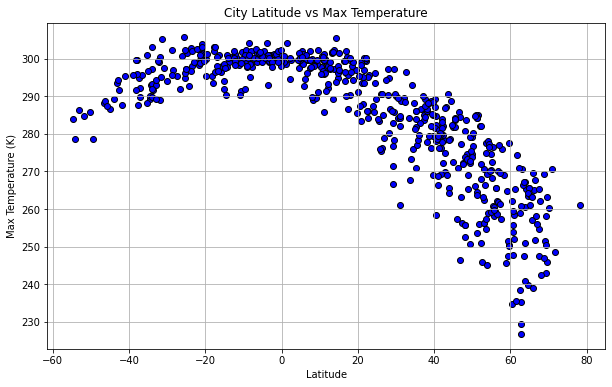

<Figure size 432x288 with 0 Axes>

In [11]:
# Plotting Latitude vs Maximum Temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

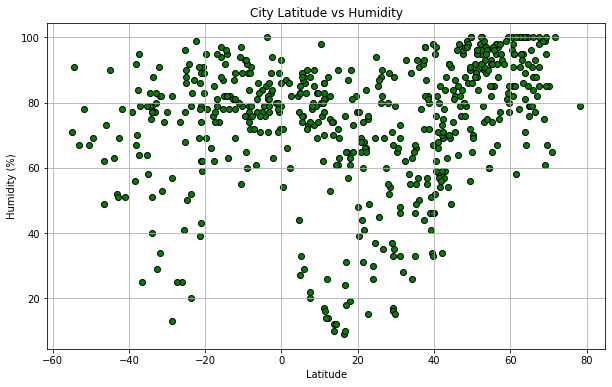

<Figure size 432x288 with 0 Axes>

In [12]:
# Plotting Latitude vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green', edgecolor='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

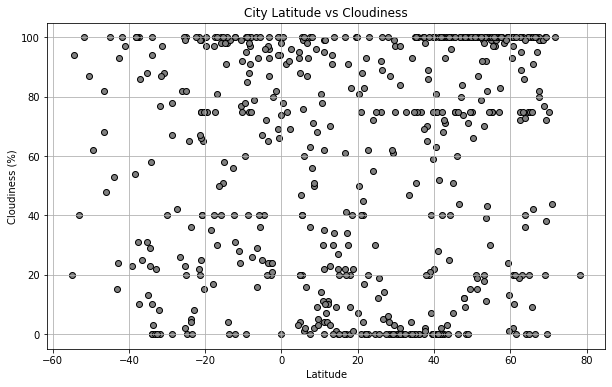

<Figure size 432x288 with 0 Axes>

In [13]:
# Plotting Latitude vs Cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='gray', edgecolor='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

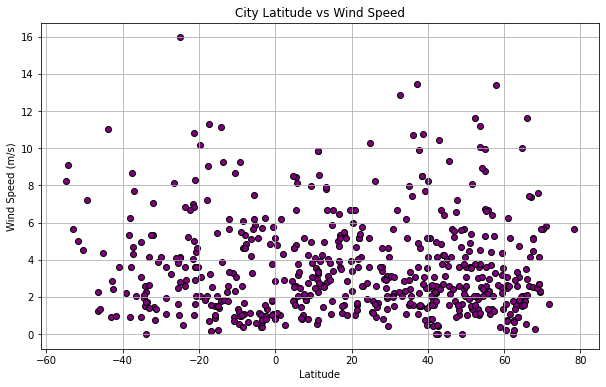

<Figure size 432x288 with 0 Axes>

In [14]:
# Plotting Latitude vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple', edgecolor='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("C:/Users/jaypa/OneDrive/Documents/GitHub/UofT Bootcamp/python_api_challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', edgecolor='black')

    # Add the regression line
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, "r-")

    # Annotate with the linear equation and the r-squared value
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
    plt.annotate(line_eq, (x.min(), y.min() + 0.2 * (y.max() - y.min())),
                 fontsize=14, color="red")

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,299.39,66,0,5.14,US,1707435520
4,hami,42.8000,93.4500,269.79,59,71,2.54,CN,1707435521
5,saint-francois,46.4154,3.9054,285.84,64,0,5.66,FR,1707435521
6,machico,32.7000,-16.7667,296.49,93,75,12.86,PT,1707435521
12,campbell river,50.0163,-125.2446,279.04,65,75,3.09,CA,1707435522


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,292.09,79,86,7.71,SH,1707435520
1,adamstown,-25.0660,-130.1015,296.89,90,100,15.96,PN,1707435520
2,owando,-0.4819,15.8999,298.86,72,94,1.09,CG,1707435520
7,ushuaia,-54.8000,-68.3000,283.96,71,20,8.23,AR,1707435521
8,lebu,-37.6167,-73.6500,287.67,84,31,8.64,CL,1707435522


###  Temperature vs. Latitude Linear Regression Plot

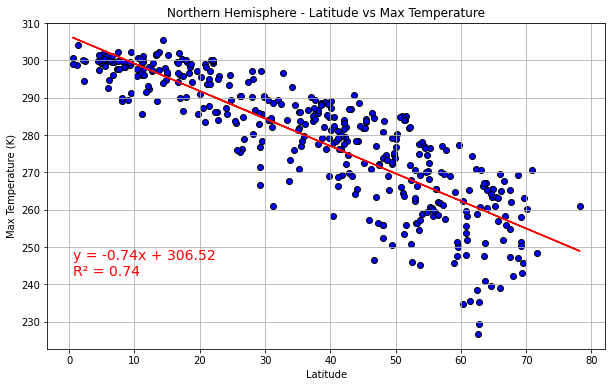

In [18]:
# Linear regression on Northern Hemisphere
# Using the function for Northern Hemisphere - Latitude vs Max Temperature
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (K)', 
                       'Northern Hemisphere - Latitude vs Max Temperature')

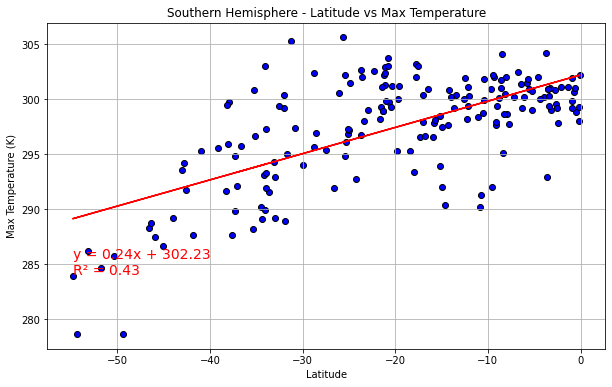

In [19]:
# Linear regression on Southern Hemisphere
# Using the function for Southern Hemisphere - Latitude vs Max Temperature
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (K)', 
                       'Southern Hemisphere - Latitude vs Max Temperature')

**Discussion about the linear relationship:** Seems like at the lowest latitude and the highest latitude we observe the lowest max temperatures.
This could be due to the fact that we are reaching the poles here.
The R^2 values for the temprature vs latitude relationship for northern hemisphere shows greater fit due to a higher value than the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

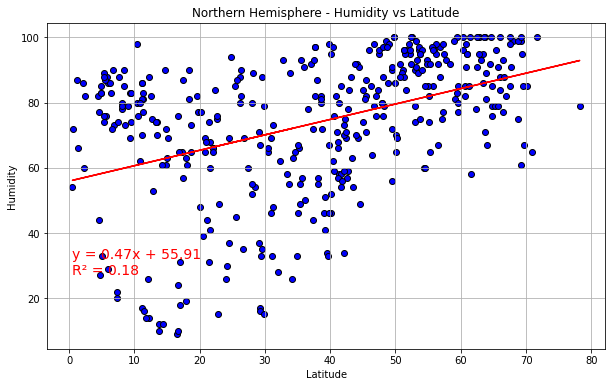

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity', 
                       'Northern Hemisphere - Humidity vs Latitude')

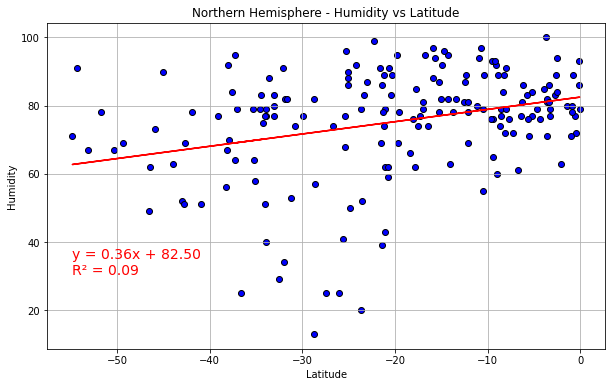

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity', 
                       'Northern Hemisphere - Humidity vs Latitude')

**Discussion about the linear relationship:** There seems to be a positive linear relationship between humidity and latitude for both the southern and northern hemisphere. Both regressions have a low R^2 value, thus lots of variability is not explained using this regression.

### Cloudiness vs. Latitude Linear Regression Plot

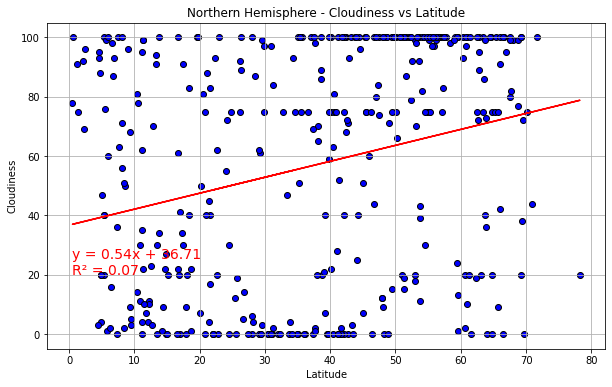

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Northern Hemisphere - Cloudiness vs Latitude')

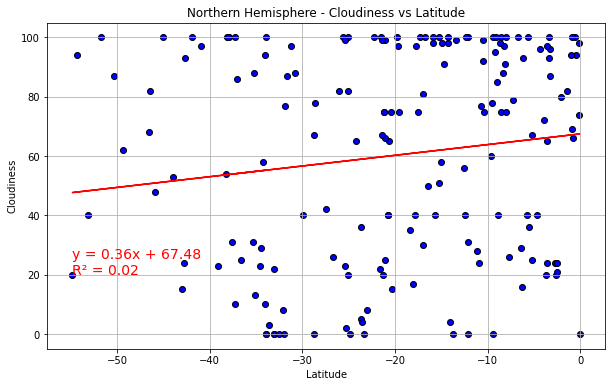

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Northern Hemisphere - Cloudiness vs Latitude')

**Discussion about the linear relationship:** There seems to be a positive linear relationship between cloudiness and latitude for both the southern and northern hemisphere. Both regressions have a low R^2 value, thus lots of variability is not explained using this regression.

### Wind Speed vs. Latitude Linear Regression Plot

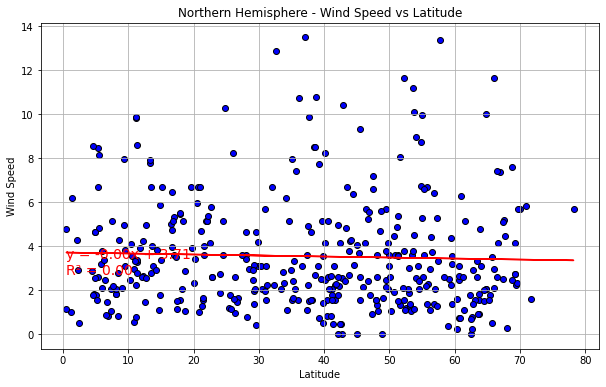

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Northern Hemisphere - Wind Speed vs Latitude')

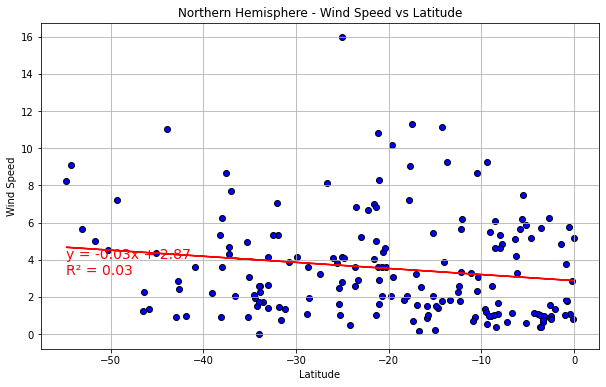

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Northern Hemisphere - Wind Speed vs Latitude')

**Discussion about the linear relationship:** There seems to be a very weak linear relationship between wind speed and latitude for both the southern and northern hemisphere. Both regressions have a very low R^2 value, thus lots of variability is not explained using this regression.